In [2]:
from environment import MountainCar
import numpy as np
class LinearModel:
    def __init__(self, state_size: int, action_size: int, lr: float, indices: bool):
        self.state_size = state_size
        self.action_size = action_size
        self.lr = lr
        self.indices = indices
        self.w = np.zeros((action_size,state_size))
        self.b = 0

    """indices is True if indices are used as input for one-hot features.
    Otherwise, use the sparse representation of state as features
    """
    def predict(self, state):
        state_vector = np.zeros(self.state_size)
        for key,value in state.items():
            state_vector[key] = value
        Q_list = []
        for i in range(self.action_size):
            Q_i = np.dot(self.w[i],state_vector)+self.b
            Q_list.append(Q_i)
        return Q_list
    """
    Given state, makes predictions.
    """
    
    def update(self, state, action: int, target: int):
        state_vector = np.zeros(self.state_size)
        for key,value in state.items():
            state_vector[key] = value
        temp = np.dot(state_vector,self.w[action]) + self.b - target
        grad_w = self.lr*temp*state_vector
        self.w[action] = self.w[action] - grad_w
        grad_b = self.lr*temp
        self.b = self.b - grad_b
        return 
    """
    Given state, action, and target, update weights.
    """

class QLearningAgent:
    def __init__(self, env: MountainCar, mode: str, gamma: float, lr: float, epsilon: float):
        self.state = env.state
        self.mode = mode
        self.gamma = gamma
        self.lr = lr
        self.epsilon = epsilon

    def get_action(self, state):
        ran = np.random.random()
        if ran < self.epsilon:
            action = np.random.randint(0,3)
        else:
            action = np.argmax(lm.predict(state))
        return action
    """epsilon-greedy strategy.
    Given state, returns action.
    """
    def train(self, episodes: int, max_iterations: int):
        reward_list = []
        for i in range(episodes):
            e_reward = 0.0
            self.state = env.reset()
            for j in range(max_iterations):
                action = self.get_action(self.state)
                next_state, reward, done= env.step(action)
                e_reward += reward
                target = reward + self.gamma*max(lm.predict(next_state))
                lm.update(self.state,action,target)
                self.state = next_state
                if done==1:
                    break
            reward_list.append(e_reward)
        return reward_list
    """training function.
    Train for ’episodes’ iterations, where at most ’max_iterations‘ iterations
    should be run for each episode. Returns a list of returns.
    """

def weight_output(outfile):
    outfile = open(outfile, "w", encoding="utf8")
    outfile.write('{}\n'.format(lm.b))
    for j in range(lm.state_size):
        for i in range(lm.action_size):
            outfile.write('{}\n'.format(lm.w[i][j]))
    return 
def returns_output(outfile):
    outfile = open(outfile, "w", encoding="utf8")
    for i in returns:
        outfile.write('{}\n'.format(str(i)))
    return 

In [9]:
# if __name__ == "main":
# run parser and get parameters values

mode = "raw" #
weight_out = "weight.out" #
returns_out = "returns.out" #
episodes = 2000 #
iterations = 200 #
epsilon = 0.05 #
gamma = 0.999 #
lr = 0.001 #

indices = 1 if mode=="tile" else 0

env = MountainCar(mode=mode)
lm = LinearModel(state_size=env.state_space,action_size=3,lr=lr,indices=indices)
agent = QLearningAgent(env, mode, gamma, lr, epsilon)
returns = agent.train(episodes, iterations)
weight_output(weight_out)
returns_output(returns_out)

<module 'matplotlib.pyplot' from 'C:\\Users\\小圆\\AppData\\Local\\Programs\\Python\\Python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

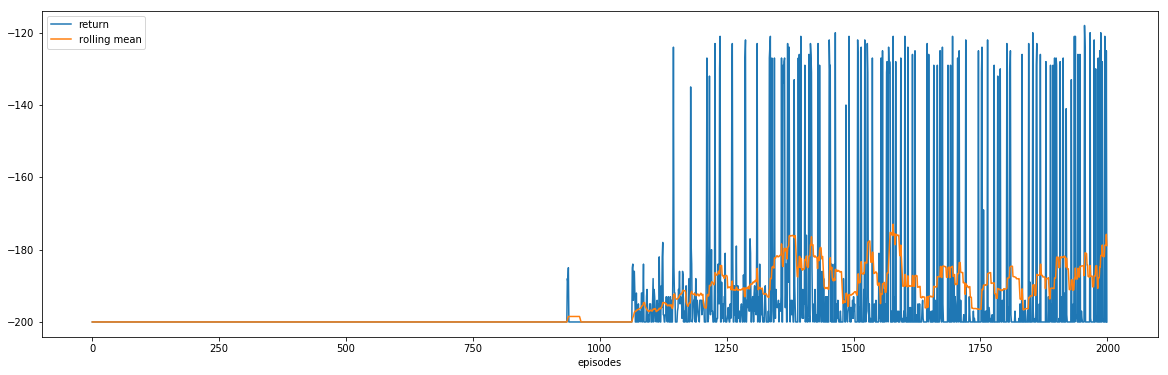

In [19]:
from matplotlib import pyplot as plt 
x = [i for i in range(2000)]
y1 = np.array(returns)
y2 = []
for i in range(25):
    y2.append(sum(returns[:i+1])/(i+1))
for i in range(26,len(returns)+1):
    y2.append(sum(returns[i-25:i])/25)
plt.figure(figsize=(20, 6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(['return','rolling mean'])
plt.xlabel('episodes')
# plt.ylabel('avg log likelihood')
plt


In [20]:
# if __name__ == "main":
# run parser and get parameters values

mode = "tile" #
weight_out = "weight.out" #
returns_out = "returns.out" #
episodes = 400 #
iterations = 200 #
epsilon = 0.05 #
gamma = 0.99 #
lr = 0.00005 #

indices = 1 if mode=="tile" else 0

env = MountainCar(mode=mode)
lm = LinearModel(state_size=env.state_space,action_size=3,lr=lr,indices=indices)
agent = QLearningAgent(env, mode, gamma, lr, epsilon)
returns = agent.train(episodes, iterations)
weight_output(weight_out)
returns_output(returns_out)

<module 'matplotlib.pyplot' from 'C:\\Users\\小圆\\AppData\\Local\\Programs\\Python\\Python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

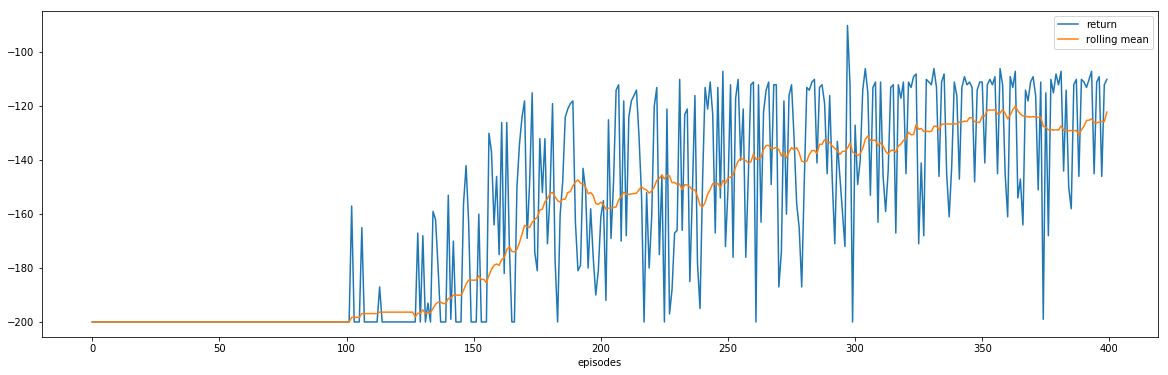

In [22]:
x = [i for i in range(400)]
y1 = np.array(returns)
y2 = []
for i in range(25):
    y2.append(sum(returns[:i+1])/(i+1))
for i in range(26,len(returns)+1):
    y2.append(sum(returns[i-25:i])/25)
plt.figure(figsize=(20, 6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(['return','rolling mean'])
plt.xlabel('episodes')
# plt.ylabel('avg log likelihood')
plt
